In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.autograd import Variable

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import copy

from skimage.io import imread
from skimage.transform import resize
%matplotlib inline

In [36]:
from os import listdir
from os.path import join

path = "C:/Users/Victor/Documents/Datasets/A1"
images = sorted([join(path,f) for f in listdir(path) if f.endswith("rgb.png")])
labels = sorted([join(path,f) for f in listdir(path) if f.endswith("fg.png")])

In [37]:
train_x = [resize(imread(f),(128,128)) for f in images]
train_y = [resize(imread(f),(128,128)) for f in labels]

C:\Users\Victor\Anaconda2\envs\test\lib\site-packages\scikit_image-0.13.1-py3.6-win-amd64.egg\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


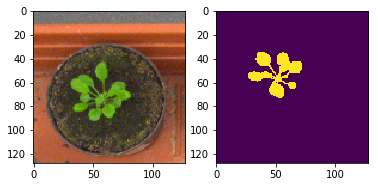

In [38]:
f,ax = plt.subplots(1,2)
ax[0].imshow(train_x[0])
ax[1].imshow(train_y[1]>0)

In [39]:
class SegNet(nn.Module):
    def __init__(self):
        super(SegNet, self).__init__()
        #TODO: Улучшить данную архитектуру
        self.proc =nn.Sequential(nn.Conv2d(3,12,kernel_size=(5,1),padding=(2,0)),
                                 nn.Conv2d(12,12,kernel_size=(1,5),padding=(0,2)),
                                 nn.ReLU(),
                                 nn.Conv2d(12,4,3,padding=1),
                                 nn.ReLU(),
                                 nn.Conv2d(4,1,3,padding=1))
    def forward(self,x):
        return F.sigmoid(self.proc(x))
s = SegNet()

In [45]:
def create_batch(size):
    indexes = np.random.randint(0,len(train_x),size)
    x,y = [],[]
    for i in indexes:
        #TODO Добавить случайный поворот на 90 градусов и зеркальные отражения (функциями numpy)
        x.append(train_x[i].transpose(2,0,1)[:3]-0.5)
        y.append(np.expand_dims(train_y[i],0)>0)
    return Variable(torch.from_numpy(np.stack(x)).float()),Variable(torch.from_numpy(np.stack(y).astype(np.int)).float())

optimizer = optim.Adam(s.parameters())
losses = []
#TODO: Задать функцию потерь
for i in range(100):
    x,y = create_batch(10)
    optimizer.zero_grad()
    
    y_pred = s(x)
    #TODO: Вычислить функцию потерь и посчитать гардиенты для графа

    losses.append(loss.data[0])
    optimizer.step()


C:\Users\Victor\Anaconda2\envs\test\lib\site-packages\torch\nn\functional.py:1189: UserWarning: Using a target size (torch.Size([10, 128, 128])) that is different to the input size (torch.Size([10, 1, 128, 128])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


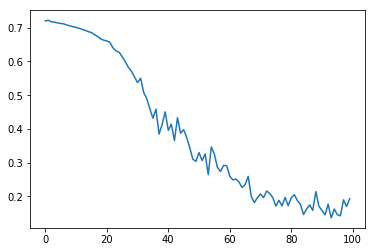

In [46]:
plt.plot(losses)

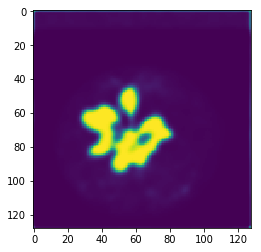

In [48]:
s.eval()
x,_ = create_batch(1)
res = s(x)
plt.imshow(res.data.numpy()[0,0])